**Computer Assignment 1 (Langevin sampling algorithm)**

In [26]:
import torch
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)

Plotting options (do not change)

In [27]:
plotting_range = np.array([[-4, 6], [-4, 6]])
nbins = 50
density = False

Specify mean and covariance

In [28]:
mean = torch.tensor([1., 1.])
cov = torch.tensor([[1., 0.9],
        [0.9, 1.]])
cov_inv = torch.linalg.inv(cov) # needed for the score function

The log density of a multivariate gaussian is
$$
\log p(\boldsymbol{x}) = -\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\boldsymbol{x}-\boldsymbol{\mu}) + C,
$$
where $C$ is a constant. The score function is then
$$
\phi ( \boldsymbol{x}) = \nabla_{\boldsymbol{x}} \log p(\boldsymbol{x}) = -\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu}).
$$

In [29]:
def score(x):
    return -cov_inv @ (x - mean)

The Langevin iteration is defined as
$$
\boldsymbol{x}_{t+1} = \boldsymbol{x}_t + \mu \phi (\boldsymbol{x}_t) + \sqrt{2 \mu} \boldsymbol{n}_t,
$$
where $\boldsymbol{n} \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$ and $\mu$ is the step size.

In [30]:
def langevin_dynamics(x0, T, mu):
    samples = []
    x = x0
    for t in range(T):
        n = torch.randn(x0.size())
        x = x + mu*score(x) + torch.sqrt(torch.tensor(2*mu))*n
        samples.append(x)
    return np.array(samples)

Considered scenarios

In [31]:
Ts = [1_000, 10_000, 100_000]
mus = [0.001, 0.01, 0.15]
x0 = torch.tensor([0,0]) # start from origin

Run sampling

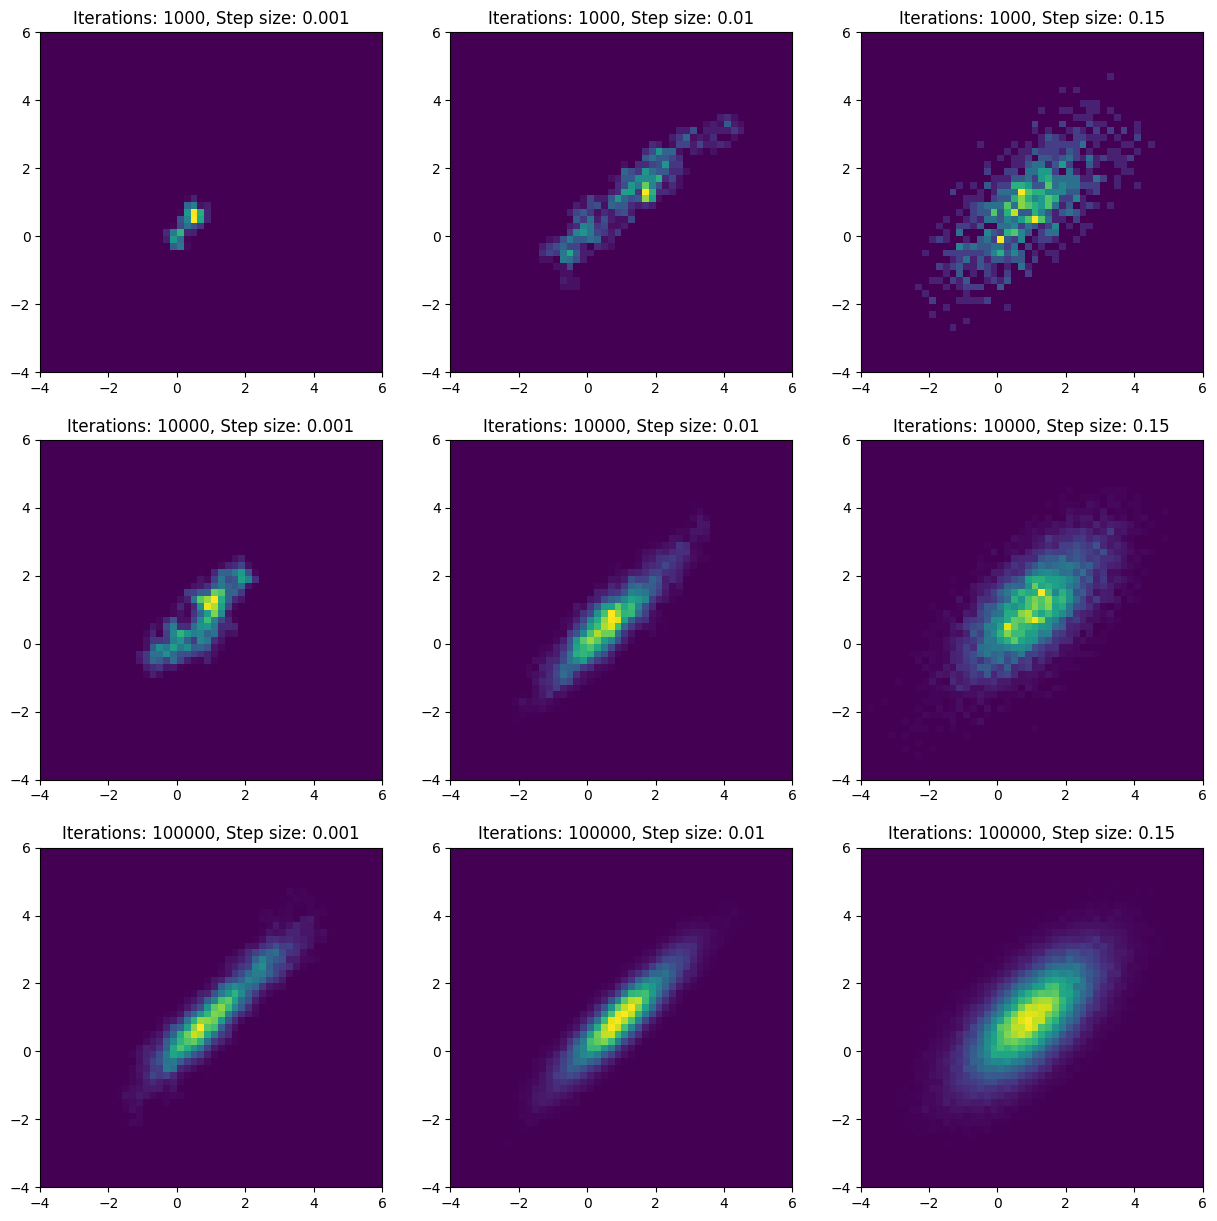

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i,T in enumerate(Ts):
    for j,mu in enumerate(mus):
        samples = langevin_dynamics(x0,T,mu)
        axes[i,j].hist2d(samples[:, 0], samples[:, 1], bins=nbins, range=plotting_range, density=False)
        axes[i,j].set_title(f'Iterations: {T}, Step size: {mu}')
plt.show()

Compare results to the target

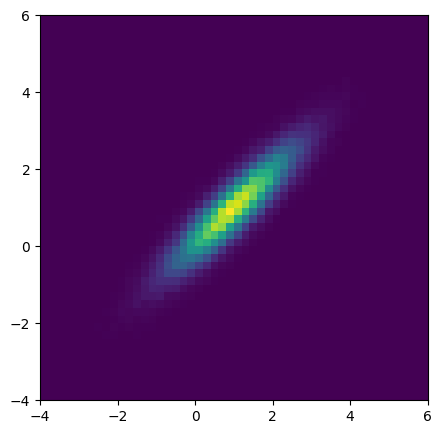

In [33]:
target = torch.distributions.multivariate_normal.MultivariateNormal(mean, cov)
target_samples = target.sample((Ts[2],))
plt.figure(figsize=(5, 5))
plt.hist2d(target_samples[:, 0], target_samples[:, 1], bins=nbins, range=plotting_range, density=False)
plt.show()

The best hyperparameters were $T=100000$ and $\mu=0.01$. All runs started from the origin, i.e. $\boldsymbol{x}_0 = \boldsymbol{0}$. The step size needs to be small similarly as in SGD so that we don't make too drastic jumps e.g. bouncing between modes, but continue going towards increasing probability mass, while the noise term allows us not to get stuck in modes. The number of steps needs to be high, since the Langevin algorithm is a Markov process. This allows us to explore the whole distribution and also to move out from the starting position.

**Computer Assignment 2 (GAN)**

### Download data

In [34]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

dataset1 = datasets.MNIST("data", train=True, download=True, transform=transform)
dataset2 = datasets.MNIST("data", train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=batch_size)

100%|██████████| 9.91M/9.91M [00:03<00:00, 2.57MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 214kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 252kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.08MB/s]


NameError: name 'batch_size' is not defined